# About the Data
We have a collection of continuous and categorical data extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker. It contains 15 different variables about people that have either made over or under 50,000 dollars in a year. I decided to look at this set of data because I wanted to see what were some factors that would help predict one's income. 50,000 dollars in 1994 adjusted for inflation today is equal to 84,541.84 dollars. 

The data was downloaded from kaggle and can be seen here: https://www.kaggle.com/uciml/adult-census-income

# Food for Thought

1. What are the 3 most prevalent factors that people that make over 50k have?

2. Does having a higher education level mean that you will have more income, and potentially work less?

3. What can we say about the difference in income between different ethnicities? Is there a statistically significant difference in incomes between sexes based on age? 


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline 

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
def ControlFor(x):
    return sum(x=='?')
df.apply(ControlFor)

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

There seems to be unknowns for workclass, occupation, and native country. I decided to omit the unknowns in workclass later on, assume that unknowns in native country mean non USA native, and omit the use of occupation as a variable.

In [5]:
#Omitting the '?' so that my graph doesn't look as jarring later on. 
data = df[df.workclass !='?']

In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [7]:
df.shape

(32561, 15)

In [8]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
# There were too many countries listed initially so I decided to simplify it by setting it as either USA or non USA.
df.loc[df['native.country']!='United-States', 'native.country'] = 'non_usa'

# Question 1 

## What are the 3 most prevalent factors that people that make over 50k have?

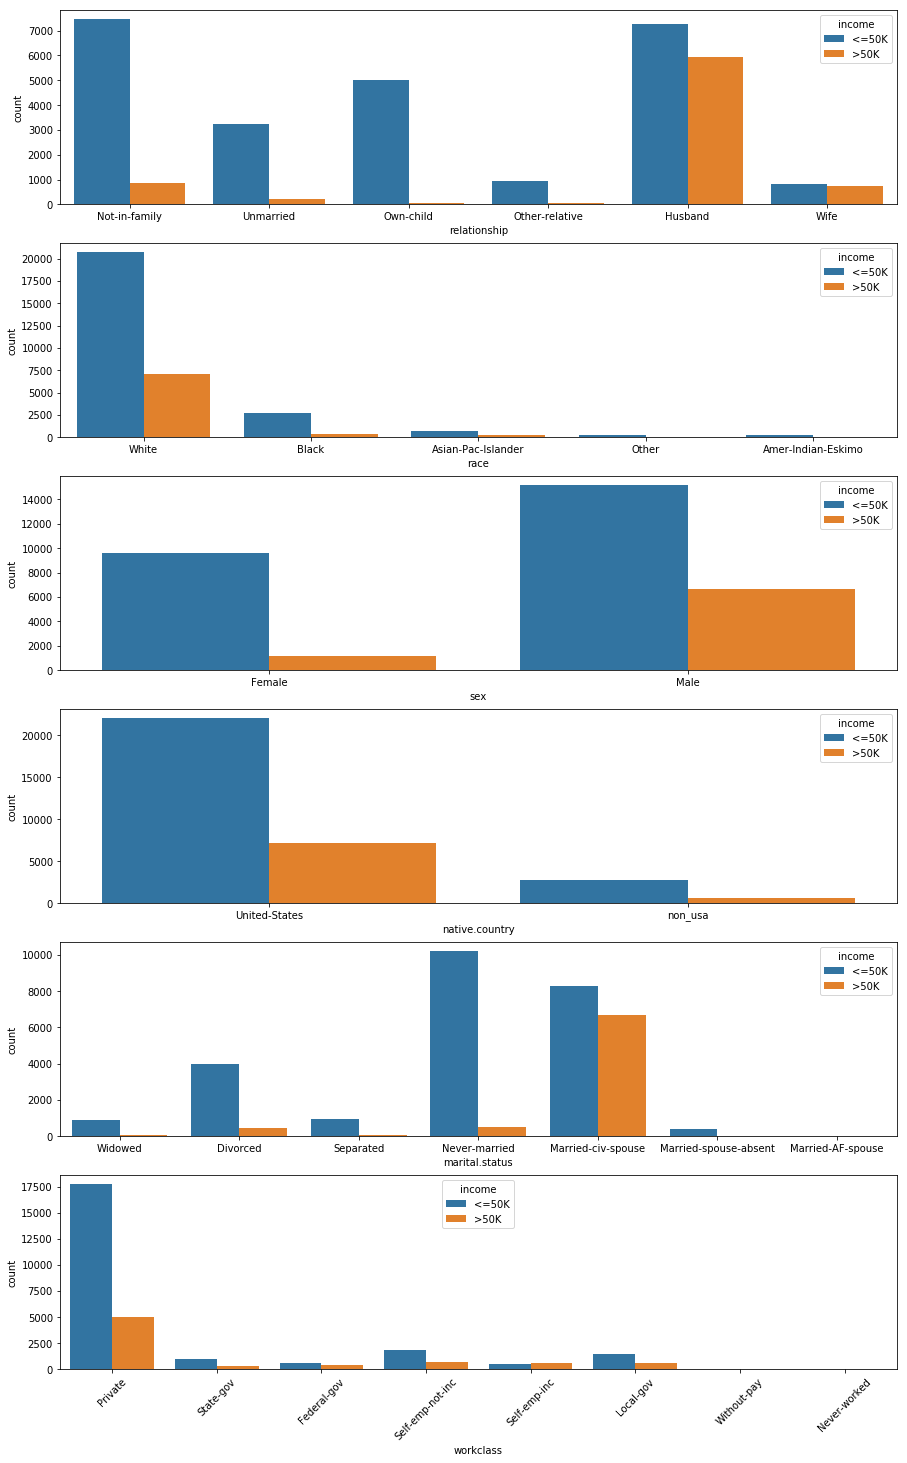

In [10]:
fig, (a, b, c, d, e, f) = plt.subplots(6,1,figsize=(15,25))
plt.xticks(rotation=45)
sns.countplot(df['relationship'],hue=df['income'],ax=a)
sns.countplot(df['race'],hue=df['income'],ax=b)
sns.countplot(df['sex'],hue=df['income'],ax=c)
sns.countplot(df['native.country'],hue=df['income'],ax=d)
sns.countplot(df['marital.status'],hue=df['income'],ax=e)
sns.countplot(data['workclass'],hue=df['income'],ax=f)
#I used data instead of df to omit the question mark in the data.

plt.show()

Although each of the graph's y axis has a different max count, we can still see that each graph has a certain x variable where those that make over 50,000 dollars a year cluster together. Additionally, we can see that married couples, who are husbands that are white with US citizenship and works in the private sector seem to be the majority of the people that made over 50,000 that year. 
 
At first glance we may see that marital status and relationship both show strong definitive counts, but I believe that ultimately those graphs reflect similar things due to the fact that the group that has the most people that make over 50k in marital status are married couples and husbands in relationships. 
   
We can see in the race graph that the white ethnicity are the most likely to make over 50k but they are also the largest subset of that group with the most amount of people that make less than 50k. 
People born in USA overwhelmingly made more than 50k compared to their counterparts but this is also reasonable due to the fact that there are more native citizens in the US than not and that people that are native to the US have probably had more time to develop their careers and income compared to their non native counterparts. 
   
For the work class we can see that the private sector is the majority leader in people that make over 50k but they are also the most amount of people that make less than 50k. This is another reasonable result due to the private sector being larger than the public sector or the other categories in this graph.
  
Lets use a box plot next to look at age and hours per week since I didn't include those.  

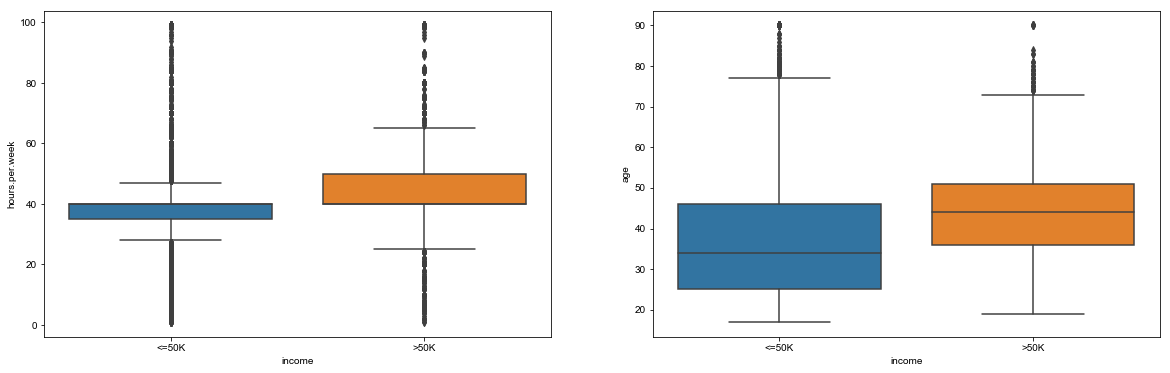

In [11]:
fig, (a,b) = plt.subplots(1,2,figsize=(20,6))
sns.set_style("whitegrid")
sns.boxplot(y='hours.per.week',x='income',data=df,ax=a)
sns.boxplot(y='age',x='income',data=df,ax=b)

plt.show()

It seems that the median of both groups for hours per week is 40 hours, but those that work over 40 hours are more likely to earn over 50k. There seems to be a lot of outliers in the hours per week graph but we will try to focus on the median of the groups in the graph since we are trying to look for the majority of the people. As age goes up, the likelihood of earning more than 50k also increases for the sample as a whole.

# Answering Question 1 

The highest counts for the various plots made above were the categories gender: male at ~7000, race: white at ~6000 and marital status: married at ~7000. The reason that oen of the qualities shared between people that make over 50k could be that there are just more men in this sample size but lets conduct a t test further down the line to see if there is any statistical significance. Caucasians having an overwhelming amount of people that make over 50k but there is a huge sample size disparity between caucasian people and the other races. Lastly, married couples could potentially be the leader in making over 50k due to the fact that they could be two incomes added together. Another reason can also be that married couples are older so they tend to have had more time to build their careers too.  

# Question 2

## Does having a higher education level mean that you will have more income, and potentially work less?

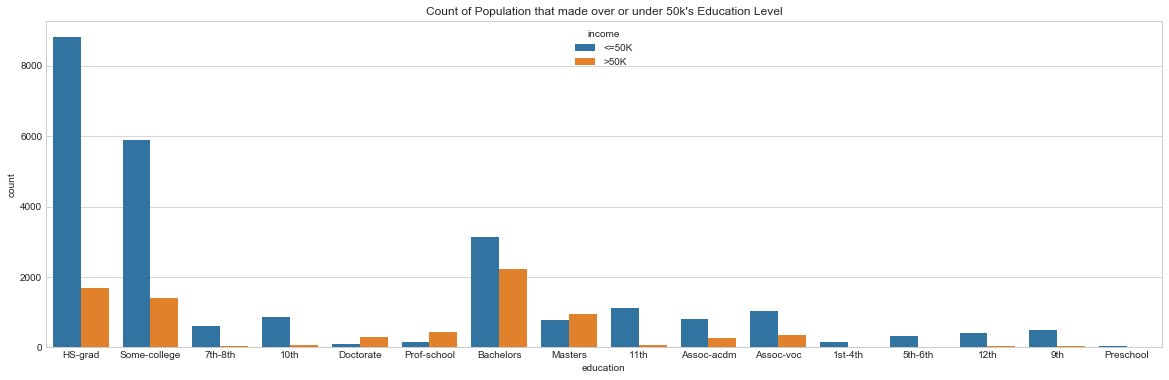

In [12]:
fig, ax = plt.subplots(figsize=(20,6))
sns.set_style("whitegrid")
sns.countplot(df['education'],hue=df['income'])
ax.set_title("Count of Population that made over or under 50k's Education Level")

plt.show()

Here, we notice that a lot of people with bachelor degrees made over 50k. In fact, they are the majority of the people that made over 50k. Parents have always their children that the better the education, the better the financial outcome. 
Something to take note of in this graph is that even after graduating college, the bachelors's majority still makes less than 50k which could be attributed to student loans. 
It seems that the parental conventional wisdom holds true though according to this graph since those that either completed college partially or only graduated high school have overwhelmingly the majority of their groups in the categor that made less than 50k. 
Conventional wisdom holds true so far as the graph shows that having a masters or a doctorate will boost the chances of having a higher income. However, it seems to be that only at the doctorate level, the significance in that sample set is larger from eyeballing the graph. 
Lets try to dive deeper into it. 

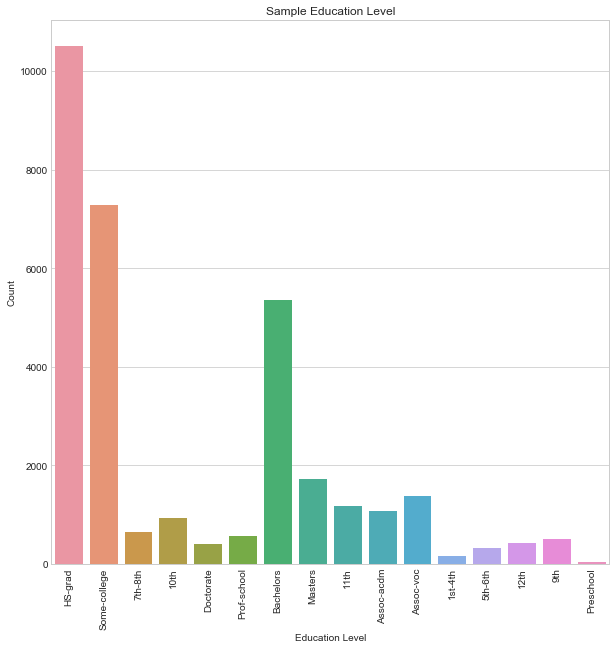

In [13]:
# Setting up parameters so that I can create a bar plot. 

def dict(data):
    y_values = {}
    
    for level in data:
        if y_values.get(level):
            y_values[level] += 1
        else:
            y_values[level] = 1
   
    return y_values
            
edu = dict(df['education'].values)

fig, ax = plt.subplots(figsize=(10,10))
sns.set_style("whitegrid")
sns.barplot(x=list(edu.keys()), y=list(edu.values()),data=df)
ax.set(xlabel='Education Level', ylabel='Count')
plt.title('Sample Education Level')
plt.xticks(rotation = 90)

plt.show()


Without the addition of looking at income, we can see that the majority of people have graduated high school, the second most common feature is that people don't finish college and the third most common occurence is people graduating college. Next, let's see how much these people with different education levels work.

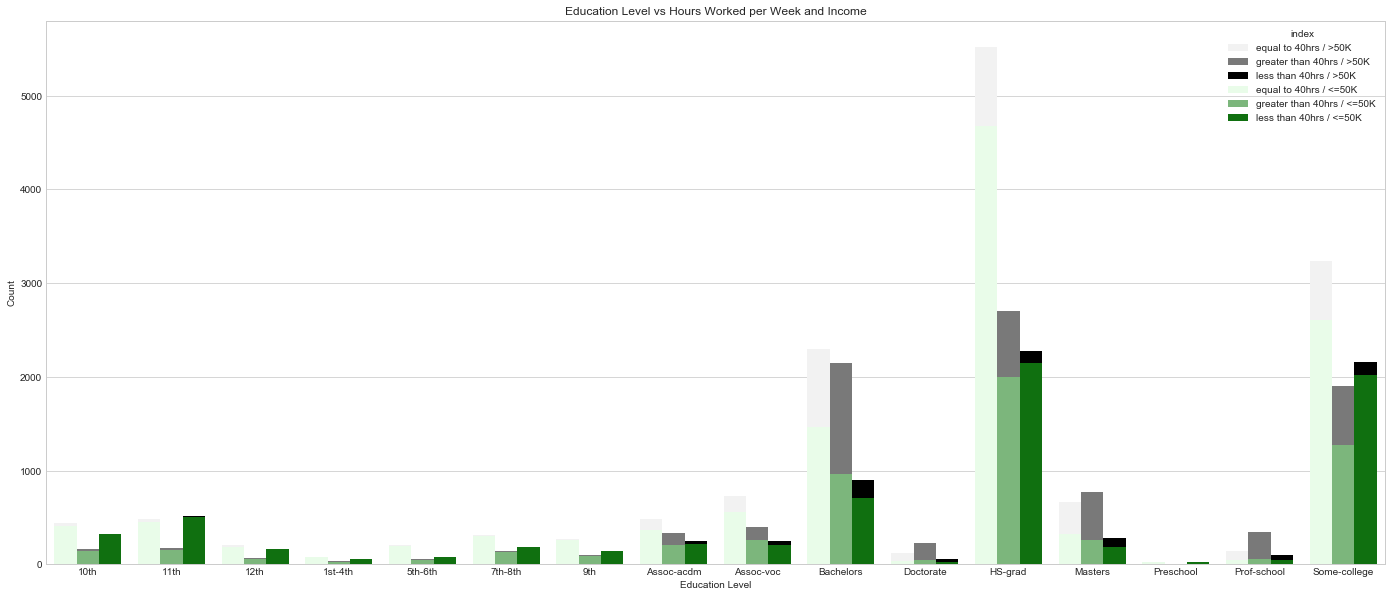

In [14]:
# There are too many different hours that could be reported so for simplicity sake, we will set up parameters 
# so that 'hours per week' will only contain <40 hours, 40 hours, and >40 hours worked. 

def diff_hours(hours_worked):
    cat_hours = {}
    
    for hour in hours_worked:
        if cat_hours.get(hour[1]) == None:
            cat_hours[hour[1]] = {'less than 40hrs / >50K':0, 'equal to 40hrs / >50K':0,
                                  'greater than 40hrs / >50K':0}
        if hour[0] < 40:
            cat_hours[hour[1]]['less than 40hrs / >50K'] += 1
        elif hour[0] == 40:
            cat_hours[hour[1]]['equal to 40hrs / >50K'] += 1
        else:
            cat_hours[hour[1]]['greater than 40hrs / >50K'] += 1 
        
    return cat_hours

def diff_hours_under(hours_worked):
    cat_hours = {}
    
    for hour in hours_worked:
        if hour[2] == '>50K':
            continue
        if cat_hours.get(hour[1]) == None:
            cat_hours[hour[1]] = {'less than 40hrs / <=50K':0, 
                                  'equal to 40hrs / <=50K':0, 'greater than 40hrs / <=50K':0}
        if hour[0] < 40:
            cat_hours[hour[1]]['less than 40hrs / <=50K'] += 1
        elif hour[0] == 40:
            cat_hours[hour[1]]['equal to 40hrs / <=50K'] += 1
        else:
            cat_hours[hour[1]]['greater than 40hrs / <=50K'] += 1 
        
    return cat_hours
           
stats = diff_hours(df[['hours.per.week','education', 'income']].values)
df_stats = pd.DataFrame(stats)
df_stats = df_stats.reset_index()
df_stats = pd.melt(df_stats, id_vars=['index'])

stats_under = diff_hours_under(df[['hours.per.week','education', 'income']].values)
df_under = pd.DataFrame(stats_under)
df_under = df_under.reset_index()
df_under = pd.melt(df_under, id_vars=['index'])

sns.set_style("whitegrid")
sns.set_context({"figure.figsize": (24, 10)})
sns.barplot(x='variable', y='value', hue='index', data=df_stats, color="black")

bottom_plot = sns.barplot(x='variable', y='value', hue='index', data=df_under, color="green")
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level vs Hours Worked per Week and Income')

plt.show()

We see from this graph that overwhemingly, no matter what one's education level is, that person will still work 40 hours or more. The less educated a person is the less that person seeems to work. This may be because of employment opportunities or inability to hold down a job. Lastly, we can see from the graph that, the more educated a person is, the more likely that person will ultimately end up working more than 40 hours a week. 

Additionally, we can see that the less educated a person is, the less likely that person will make 50k. Ultimately, we can make a conclusion from this graph that the better the education, the better the financial outcome.   

# Answering Question 2 

From the graphs that I have created, it seems that parental conventional wisdom wins out in the aspect of education level in relationship with income. However, it seems that those that have a higher level of education not only make more, but also work more than their counterparts. 

# Question 3 
## What can we say about the difference in income between different ethnicities? Is there a statistically significant difference in incomes between sexes based on age? 

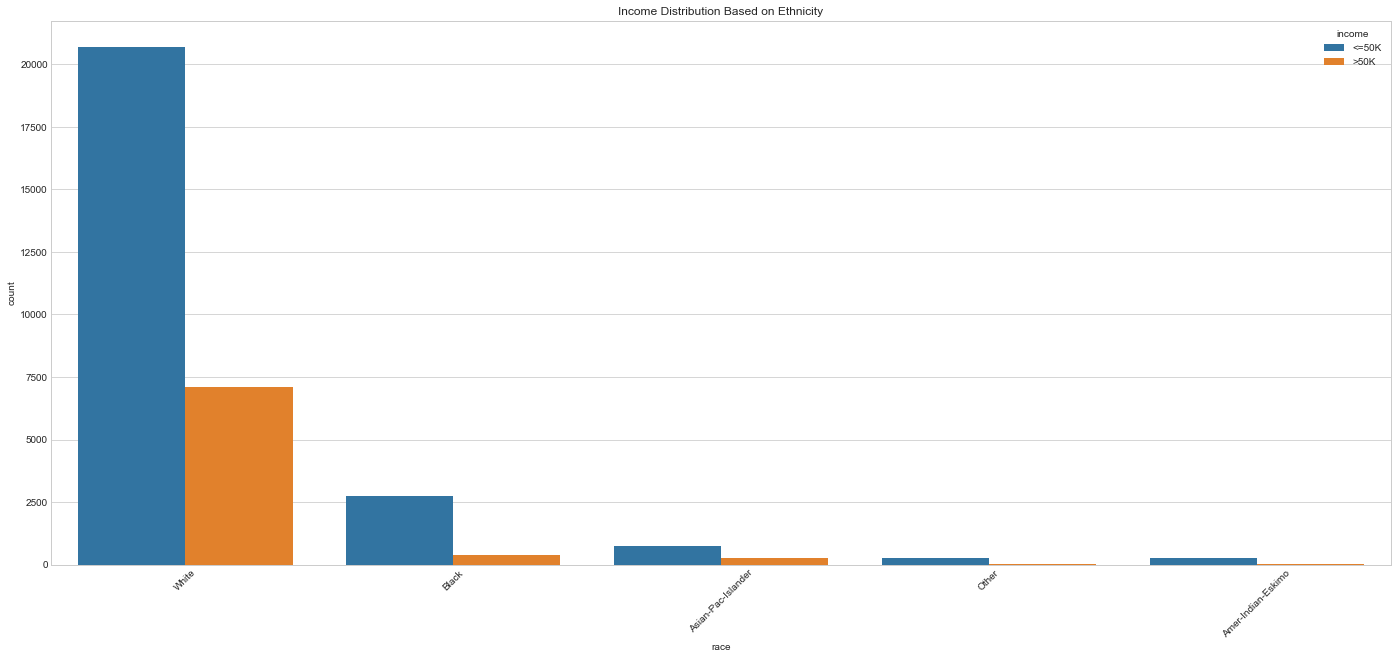

In [42]:
plt.xticks(rotation=45)
sns.countplot(df['race'],hue=df['income'])
plt.title('Income Distribution Based on Ethnicity')
plt.show()

Lets borrow from graph one to refresh our memory about the differences in income based on ethnicity. We can see that caucasian people tend to be the most amount of people to make over 50k but they are also the greatest amount of people within that sample set. Lets remove the caucasian variable and look at the graph again to have a better understanding of the other races. Furthermore, lets conduct a t test on age and gender later to make sure that the difference in the wage gap isn't just due to sample size or chance. 

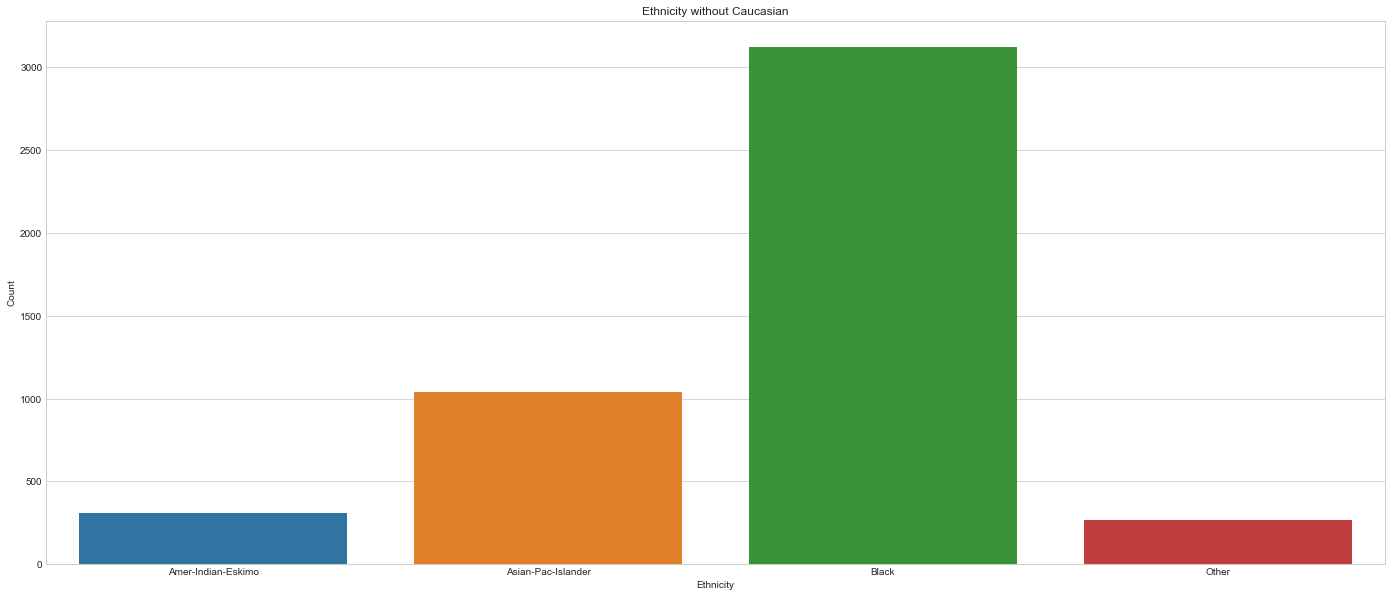

In [17]:
# Here I am going to write a method that removed white from the race variable and plot the graph again
# to have a better look at the other races. 

def count_race(races):
    race_dic = {'race': {}}
    for a_race in races:
        if a_race[0] == 'White':
                continue
        if race_dic['race'].get(a_race[0]) == None:
            race_dic['race'][a_race[0]] = 0
        else:
            race_dic['race'][a_race[0]] += 1
            
    return race_dic

race_stats = count_race(df[['race']].values)
df_race = pd.DataFrame(race_stats)
df_race = df_race.reset_index()
df_race = pd.melt(df_race, id_vars=['index'])


sns.barplot(x='index', y='value', data=df_race,)
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.title('Ethnicity without Caucasian')

plt.show()

Here, we can see that without Caucasians in the sample size, we see that the ethnicity with the most amount of people are the African American sample size with a huge margin over the other races. Solidly holding second place in this graph would be the Asian sample set. If we look back up one graph, we can also see that the majority of African Americans make less than 50k a year too. 
Besides looking at a bar graph based on the ethnicity, lets generate a pie chart on ethnicity including the Caucasian race so that there is a bit more of a complete picture. 

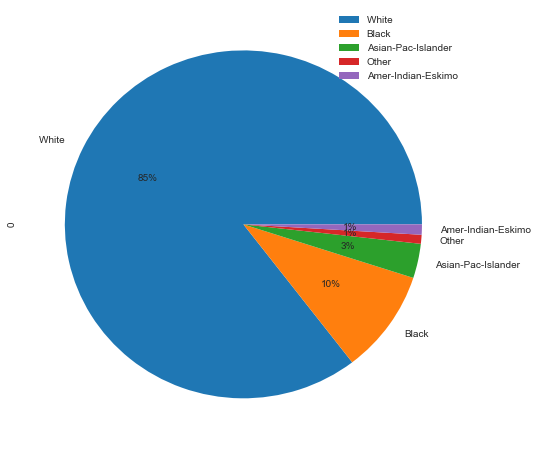

In [18]:
# Borrowing from the stats code above, I'm going to use it help me plot my pie chart. 
def count_race_two(races):
    result = [0, 0, 0, 0, 0]
    
    for a_race in races:
        if a_race == 'White':
            result[0] += 1
        elif a_race == 'Black':
            result[1] += 1
        elif a_race == 'Asian-Pac-Islander':
            result[2] += 1
        elif a_race == 'Other':
            result[3] += 1
        elif a_race == 'Amer-Indian-Eskimo':
            result[4] += 1
             
    return result

stat = count_race_two(df['race'])

df_pie = pd.DataFrame(stat, index=['White ', 'Black', 'Asian-Pac-Islander', 
                                                  'Other', 'Amer-Indian-Eskimo'])
 
# make the plot
df_pie.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.0f%%')

plt.show()


After plotting the pie plot, we have an even clearer understanding of the scope of the sample ethnicity. Discounting incomes and inspecting pure ethnicity, we can see that Caucasian people take 85 percent of the sample size and that African Americans only take up 10 percent of the sample size. The silver medal in the previous graph (excluding Caucasians) Asians only take up 3 percent of the sample size. Finally, lets perform a t test on age to see if there is any statistical signifcance.

In [59]:
#First, lets differentiate the gender in the data.
def separate_gender(gender):
    result = [0, 0]
    
    for x in gender:
        if x == 'Male':
            result[0] += 1
        elif x == 'Female':
            result[1] += 1
             
    return result

gender_stat = separate_gender(df['sex'])
print('Total Count of Gender Sample Size[Male, Female]:' + str(gender_stat))

total_gender = sum(gender_stat)
print('The sum of the gender sample size is: ' + str(total_gender))

def male_age_income(people):
    result = []
    
    for person in people:
        if person[0] == 'Female':
            continue
        if person[2] == '>50K':
            result.append(person[1])
    return result

def female_age_income(people):
    result = []
    
    for person in people:
        if person[0] == 'Male':
            continue
        if person[2] == '>50K':
            result.append(person[1])
            
    return result

male = male_age_income(df[['sex', 'age', 'income']].values)
female = female_age_income(df[['sex', 'age', 'income']].values)

print('\nSample size of males that make over 50k: ' + str(len(male)))
print('Average age of males that makes over 50k:')
print(np.mean(male))

print('\nSample size of females that make over 50k: ' + str(len(female)))
print('Average age of females that make over 50k')
print(np.mean(female))

from scipy.stats import ttest_ind
print(ttest_ind(male, female, equal_var=False))
    

Total Count of Gender Sample Size[Male, Female]:[21790, 10771]
The sum of the gender sample size is: 32561

Sample size of males that make over 50k: 6662
Average age of males that makes over 50k:
44.62578805163614

Sample size of females that make over 50k: 1179
Average age of females that make over 50k
42.125530110262936
Ttest_indResult(statistic=7.562472748645479, pvalue=6.578060278481473e-14)


After performing the t test based on the ages of females and males that made over 50k, we can see from the t test that there is a statistically significant difference at p = 0.05 and even at a p = 0.01 level. There is definitely a significant difference between the average age of females and males who have earned over 50k. This could be because of the larger sample size from the males who make over 50k, which might mean that they have more individuals who are a bit on the older side skewing the mean of the age. There could also be other reasons such as women that are more driven than their male counterparts due to barrier of entry in certain industries such as engineering or science or math. 

# Answering Question 3

The null hypothesis of this two sample t test that was just conducted is that there is no statistically significant difference between the males and females that made over 50k. However, the results from above show that there is definitely a significant difference and that this difference was not purely based on the chance of the sample size. 

Furthermore, after looking at the graph of the difference in incomes between ethnicities, we can conclude that although Caucasians make more than other ethnicities, they were also the majority of the sample size during 1994. It is worth taking note though that although African Americans are the second largest ethnicity, that ethnicity did not possess a proportional amount of individuals that had made over 50k. 

These are two of the noteworthy things that have immediately grabbed my attention, but alas, I have reached the end of my report, but these could be relevant questions that could be further studied later on in the course. 

# Conclusion

Overall, this report and analyses were fun to do, but it was definitely difficult to transform the data into ways that I could present my thoughts or ideas. For example, I wasn't able to create any scatter plots due to the fact that I was hampered by the income variable only containing the responses of >50k or <=50k. Besides hindering me on certain graphing options, it also made my t test harder to do and I had to reshape my question to effectively use the data I had obtained. 

After answering these three initial questions that I have proposed, I find that more questions have popped up. For example, how long did it take for people with bachelor degrees and loans to clear up their loans, or why do the majority of the African American sample size make less than 50k, or even what are the factors that that caused the differences in the age of males and females that made over 50k.   

Lastly, I would want to use machine learning or decision tree learning to see if I could accurately predict the future incomes of certain individuals. 